In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('5g_slice_traffic.csv',delimiter=',')
data.head()

,Hour_of_Day,Active_Users,Latency_ms,Packet_Loss_Rate,Bandwidth_MHz,Throughput_Demand_Mbps
0,0,159,24.543011,0.040075,20,499.119655
1,1,123,21.689001,0.008515,40,438.435279
2,2,112,20.005238,0.020389,60,474.344666
3,3,104,20.620836,0.023325,80,534.659618
4,4,45,16.894357,0.011610,60,454.496363


In [ ]:
# Calculamos el componente X (Seno)
data['hour_sin'] = np.sin(2 * np.pi * data['Hour_of_Day'] / 24.0)
# Calculamos el componente Y (Coseno)
data['hour_cos'] = np.cos(2 * np.pi * data['Hour_of_Day'] / 24.0)
#Validation
is_correct = np.allclose(data['hour_sin']**2 + data['hour_cos']**2, 1.0)
print(f"¿Normalización válida?: {is_correct}")
data.drop(columns='Hour_of_Day', inplace=True)
#Moviendo a la primera y segunda posicion respectivamente
data.insert(0,'hour_sin',data.pop('hour_sin'))
data.insert(1,'hour_cos',data.pop('hour_cos'))
data.head()

¿Normalización válida?: True


,hour_sin,hour_cos,Active_Users,Latency_ms,Packet_Loss_Rate,Bandwidth_MHz,Throughput_Demand_Mbps
0,0.000000,1.000000,159,24.543011,0.040075,20,499.119655
1,0.258819,0.965926,123,21.689001,0.008515,40,438.435279
2,0.500000,0.866025,112,20.005238,0.020389,60,474.344666
3,0.707107,0.707107,104,20.620836,0.023325,80,534.659618
4,0.866025,0.500000,45,16.894357,0.011610,60,454.496363


In [ ]:
import numpy as np
# df.iloc[:, [2, 7]].plot(subplots=True) # Grafica ambas columnas directamente
# plt.show()
dataset = data[['Active_Users', 'Latency_ms', 'Packet_Loss_Rate', 'Bandwidth_MHz', 'Throughput_Demand_Mbps']].values
data.head()

,hour_sin,hour_cos,Active_Users,Latency_ms,Packet_Loss_Rate,Bandwidth_MHz,Throughput_Demand_Mbps
0,0.000000,1.000000,159,24.543011,0.040075,20,499.119655
1,0.258819,0.965926,123,21.689001,0.008515,40,438.435279
2,0.500000,0.866025,112,20.005238,0.020389,60,474.344666
3,0.707107,0.707107,104,20.620836,0.023325,80,534.659618
4,0.866025,0.500000,45,16.894357,0.011610,60,454.496363


In [4]:
print(dataset.shape)
#active_user_max=dataset[:,0].max()
#NORMALIZATION 
maxs = (dataset.max(axis=0))
mins = (dataset.min(axis=0))
dataset = (dataset - mins) / (maxs - mins + 1e-10)
print(pd.DataFrame(dataset).head(10))

(10000, 5)
          0         1         2     3         4
0  0.602273  0.598026  0.211783  0.00  0.457676
1  0.465909  0.516420  0.044606  0.25  0.402031
2  0.424242  0.468275  0.107503  0.50  0.434959
3  0.393939  0.485877  0.123058  0.75  0.490265
4  0.170455  0.379325  0.061001  0.50  0.416758
5  0.090909  0.206722  0.594394  0.25  0.180139
6  0.166667  0.365236  0.062992  0.25  0.238376
7  0.068182  0.188958  0.587133  0.50  0.134990
8  0.034091  0.159453  0.104309  0.75  0.273289
9  0.053030  0.269035  0.287144  1.00  0.396172


In [5]:
data_F = np.column_stack((data['hour_sin'], data['hour_cos'], data['Packet_Loss_Rate'], dataset))
#pd.set_option('display.expand_frame_repr',False)
#pd.set_option('display.max_columns',None)
#pd.set_option('display.width',100)
print(pd.DataFrame(data_F).head(10))

          0             1         2         3         4         5     6  \
0  0.000000  1.000000e+00  0.040075  0.602273  0.598026  0.211783  0.00   
1  0.258819  9.659258e-01  0.008515  0.465909  0.516420  0.044606  0.25   
2  0.500000  8.660254e-01  0.020389  0.424242  0.468275  0.107503  0.50   
3  0.707107  7.071068e-01  0.023325  0.393939  0.485877  0.123058  0.75   
4  0.866025  5.000000e-01  0.011610  0.170455  0.379325  0.061001  0.50   
5  0.965926  2.588190e-01  0.112303  0.090909  0.206722  0.594394  0.25   
6  1.000000  6.123234e-17  0.011986  0.166667  0.365236  0.062992  0.25   
7  0.965926 -2.588190e-01  0.110932  0.068182  0.188958  0.587133  0.50   
8  0.866025 -5.000000e-01  0.019786  0.034091  0.159453  0.104309  0.75   
9  0.707107 -7.071068e-01  0.054301  0.053030  0.269035  0.287144  1.00   

          7  
0  0.457676  
1  0.402031  
2  0.434959  
3  0.490265  
4  0.416758  
5  0.180139  
6  0.238376  
7  0.134990  
8  0.273289  
9  0.396172  


Text(0.5, 1.0, 'Throuhput')

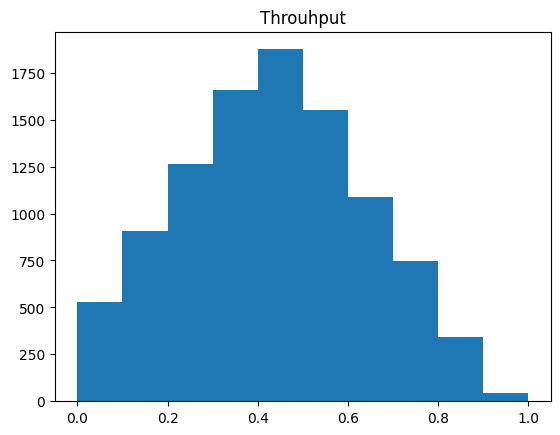

In [8]:
import matplotlib.pyplot as plt
plt.hist(data_F[:,7])
plt.title('Throuhput')